In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [1]:
from keras import Sequential
from keras.layers import Dense

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
from google.colab import files
uploaded = files.upload()
dataset= pd.read_csv(io.BytesIO(uploaded['churn.csv']))

Saving churn.csv to churn.csv


In [3]:
dataset.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
dataTypeSeries = dataset.dtypes
dataTypeSeries

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Encoding categorical data…

Now we encode the string values in the features to numerical values as a ML Algorithm can only work on numbers and not on string values.
There are many values which need to converted into numerical data

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
dataset = dataset.apply(LabelEncoder().fit_transform)
dataset

In [7]:
X = dataset.iloc[:, 1:20].values

In [8]:
X

array([[   0,    0,    1, ...,    2,  142, 2505],
       [   1,    0,    0, ...,    3,  498, 1466],
       [   1,    0,    0, ...,    3,  436,  157],
       ...,
       [   0,    0,    1, ...,    2,  137, 2994],
       [   1,    1,    1, ...,    3,  795, 2660],
       [   1,    0,    0, ...,    0, 1388, 5407]])

In [9]:
y = dataset.iloc[:, 20].values

In [ ]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X  = scaler.fit_transform(X)

In [13]:
X

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.13176632, -0.39860759],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.38773977, -0.94876238],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.51731743, -1.64188328],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.14221613, -0.13968008],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.33486261,
         0.23297901, -0.31653445],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.47405205,
         1.4723266 ,  1.13801338]])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(19, input_dim=19, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#classifier.compile(Adam(lr=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 19)                380       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 633
Trainable params: 633
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
89/89 [==============================] - 1s 4ms/step - loss: 0.5255 - accuracy: 0.7373 - val_loss: 0.4920 - val_accuracy: 0.7424
Epoch 2/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.7717 - val_loss: 0.4706 - val_accuracy: 0.7587
Epoch 3/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.7867 - val_loss: 0.4621 - val_accuracy: 0.7715
Epoch 4/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.7922 - val_loss: 0.4561 - val_accuracy: 0.7828
Epoch 5/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.7959 - val_loss: 0.4533 - val_accuracy: 0.7899
Epoch 6/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4220 - accuracy: 0.7993 - val_loss: 0.4531 - val_accuracy: 0.7871
Epoch 7/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8016 - val_loss: 0.4490 - val_accuracy: 0.7928
Epoch 8/100
8

In [17]:
eval_model=model.evaluate(X_train, y_train)
eval_model


177/177 [==============================] - 0s 1ms/step - loss: 0.3614 - accuracy: 0.8323


[0.36135828495025635, 0.8322683572769165]

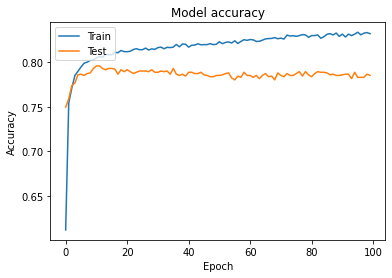

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
#classes_x = y_pred.argmax(axis=-1)   #softmax
y_pred = (y_pred> 0.5).astype("int32") #sigmoid

In [ ]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int32)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)


array([[922, 119],
       [184, 184]])

In [ ]:
accuracy_score(y_test, y_pred)

0.7849538679914834